# Speech Emotion Recognition using LSTM and RNN

## Dataset used: TESS Dataset (Toronto emotional speech set)

A dataset for training emotion (7 cardinal emotions) classification in audio

There are a set of 200 target words were spoken in the carrier phrase "Say the word _' by two actresses (aged 26 and 64 years) and recordings were made of the set portraying each of seven emotions (anger, disgust, fear, happiness, pleasant surprise, sadness, and neutral). There are 2800 data points (audio files) in total.

The dataset is organised such that each of the two female actor and their emotions are contain within its own folder. And within that, all 200 target words audio file can be found. The format of the audio file is a WAV format

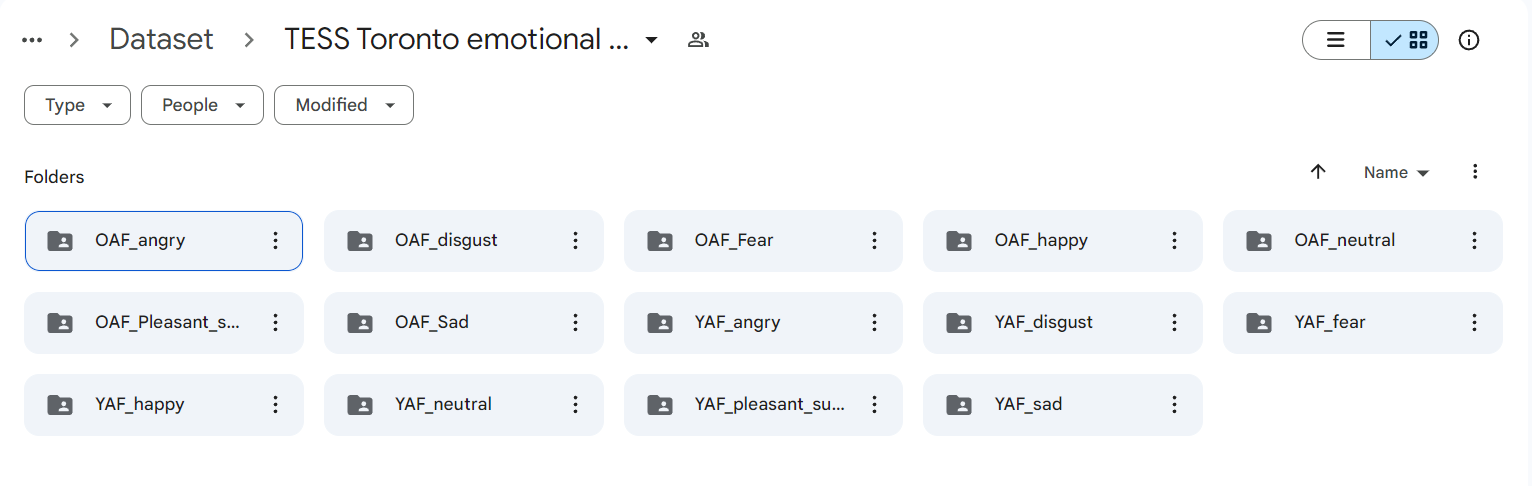

**Mounting Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56441 sha256=4416d8bf68675022066127fc02b56edb57416458824c385a7dac08d243adb106
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


np_utils is a utility library for the numpy package in Python. It provides utility functions for some common system operations and structures.

**Importing Libraries**

In [ ]:
import warnings  # Import the warnings module to handle warning messages
import pandas as pd  # Import the pandas library for data manipulation and analysis
import numpy as np  # Import the numpy library for numerical operations
import os  # Import the os module for interacting with the operating system
import librosa  # Import the librosa library for audio analysis and feature extraction
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # Import classes for data preprocessing
from sklearn.metrics import confusion_matrix, classification_report  # Import classes for model evaluation
from sklearn.model_selection import train_test_split  # Import the train_test_split function for data splitting
import keras  # Import the keras library for building deep learning models
from keras.models import Sequential  # Import the Sequential class for creating a sequential model
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization  # Import classes for building the layers of the model
from keras.utils import to_categorical  # Import the to_categorical function for one-hot encoding
from tensorflow.keras.models import Sequential  # Import the Sequential class from tensorflow.keras for creating a sequential model
from tensorflow.keras.layers import LSTM, SimpleRNN, Dense  # Import classes for building the layers of the model
from tensorflow.keras.callbacks import EarlyStopping  # Import the EarlyStopping callback for early stopping during model training
from tensorflow.keras.optimizers import Adam  # Import the Adam optimizer for model optimization
from tensorflow.keras.regularizers import l2  # Import the l2 regularizer for regularization
from tensorflow.keras.utils import plot_model  # Import the plot_model function for visualizing the model architecture
from matplotlib import pyplot as plt  # Import the pyplot module from matplotlib for data visualization
import seaborn as sns  # Import the seaborn library for statistical data visualization
from tensorflow.keras.models import Sequential  # Import the Sequential class from tensorflow.keras for creating a sequential model
from tensorflow.keras.layers import SimpleRNN, Dense  # Import classes for building the layers of the model
from tensorflow.keras.callbacks import EarlyStopping  # Import the EarlyStopping callback for early stopping during model training
from tensorflow.keras.optimizers import Adam  # Import the Adam optimizer for model optimization
from tensorflow.keras.regularizers import l2  # Import the l2 regularizer for regularization

**Loading Dataset**

In [ ]:
Tess = "/content/drive/MyDrive/IDL_Project/Dataset/TESS Toronto emotional speech set data"

**Traverse the dataset directory and extract emotions**

The provided Python script is used to traverse a directory structure, extract certain information from the filenames, and then store this information in a pandas DataFrame.

1. os.listdir(Tess): This line lists all directories in a parent directory, Tess.

2. file_emotion = [] and file_path = []: These lines initialize two empty lists. file_emotion will store the emotion information extracted from the filenames, and file_path will store the full paths to the files.

3. The script then enters a nested loop where it iterates over each directory in tess_directory_list. For each directory, it gets a list of all files in that directory using os.listdir(directory_path).

4. For each file, it splits the filename on the period character (.) to separate the name from the extension, and takes the first part (the name). It then splits this name on the underscore character (_) and takes the third part. If this part is 'ps', it appends 'surprise' to the file_emotion list; otherwise, it appends the part itself. It also constructs the full path to the file and appends this to the file_path list.

5. After it has processed all files in all directories, the script creates two pandas DataFrames: emotion_df from the file_emotion list, and path_df from the file_path list.

6. It then concatenates these two DataFrames along the column axis to create a single DataFrame, Tess_df, which has a column for emotions and a column for paths.

In [ ]:
# Get the list of directories in the 'Tess' directory
tess_directory_list = os.listdir(Tess)

# Initialize empty lists to store file emotions and file paths
file_emotion = []
file_path = []

# Iterate over each directory in the 'Tess' directory
for dir in tess_directory_list:
    # Ensure the directory path is correctly formed
    directory_path = os.path.join(Tess, dir)

    # Get the list of files in the current directory
    directories = os.listdir(directory_path)

    # Iterate over each file in the current directory
    for file in directories:
        # Extract the part of the file name before the extension
        part = file.split('.')[0]

        # Extract the emotion part from the file name
        part = part.split('_')[2]

        # Check if the emotion part is 'ps' (surprise)
        if part == 'ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)

        # Ensure the file path is correctly formed
        file_path.append(os.path.join(directory_path, file))

# Create a dataframe to store the emotions of the files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# Create a dataframe to store the paths of the files
path_df = pd.DataFrame(file_path, columns=['Path'])

# Concatenate the emotion and path dataframes horizontally
Tess_df = pd.concat([emotion_df, path_df], axis=1)

In [ ]:
Tess_df

,Emotions,Path
0,fear,/content/drive/MyDrive/IDL_Project/Dataset/TES...
1,fear,/content/drive/MyDrive/IDL_Project/Dataset/TES...
2,fear,/content/drive/MyDrive/IDL_Project/Dataset/TES...
3,fear,/content/drive/MyDrive/IDL_Project/Dataset/TES...
4,fear,/content/drive/MyDrive/IDL_Project/Dataset/TES...
...,...,...
2795,sad,/content/drive/MyDrive/IDL_Project/Dataset/TES...
2796,sad,/content/drive/MyDrive/IDL_Project/Dataset/TES...
2797,sad,/content/drive/MyDrive/IDL_Project/Dataset/TES...
2798,sad,/content/drive/MyDrive/IDL_Project/Dataset/TES...


**Emotions Count Plot**

1. Tess_df.groupby('Emotions').size(): This line groups the Tess_df DataFrame by the 'Emotions' column and calculates the size of each group. The size corresponds to the count of each unique emotion in the DataFrame.

2. .plot(kind='barh', color=sns.palettes.mpl_palette('Dark2')): This line creates a horizontal bar plot (kind='barh') of the group sizes. The color of the bars is set to the 'Dark2' color palette from Matplotlib, which is accessed through the seaborn (sns) library.

3. plt.gca().spines[['top', 'right',]].set_visible(False): This line removes the top and right spines (borders) of the plot to make it more aesthetically pleasing.

4. plt.title('Count of Emotions', size=16): This line sets the title of the plot to 'Count of Emotions' and sets the font size of the title to 16.

Text(0.5, 1.0, 'Count of Emotions')

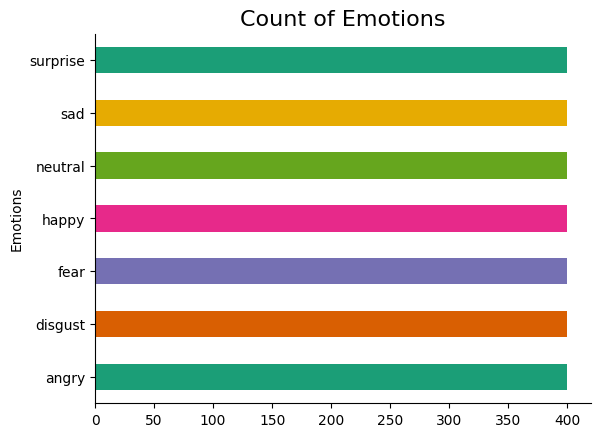

In [ ]:
# Group the 'Tess_df' DataFrame by the 'Emotions' column and calculate the size of each group
Tess_df.groupby('Emotions').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

# Hide the top and right spines (borders) of the current axes (plot)
plt.gca().spines[['top', 'right',]].set_visible(False)

# Set the title of the plot to 'Count of Emotions' with font size 16
plt.title('Count of Emotions', size=16)

**Function for creating a Waveplot**

A waveplot is a visual representation of an audio file, showing how the sound evolves over time.

1. emotions = ['neutral', 'happy', 'sad', 'angry', 'fear', 'disgust', 'surprise']: This line defines a list of emotions.

2. create_waveplot(data, sr, e, ax): This function is defined to create a waveplot for a given audio data (data), sampling rate (sr), emotion (e), and axes object (ax). The title of the plot is set to 'Waveplot for audio with {emotion} emotion', and the waveplot is created using librosa.display.waveshow().

3. fig, axs = plt.subplots(len(emotions), figsize=(10, 3*len(emotions))): This line creates a figure and a set of subplots (axs). The number of subplots is equal to the number of emotions, and the size of each subplot is 10x3.

4. The script then enters a loop where it iterates over each emotion. For each emotion, it gets the path of the second audio file associated with that emotion from the Tess_df DataFrame. It then loads the audio file using librosa.load(), which returns the audio data and the sampling rate. It then calls create_waveplot() to create a waveplot for the audio data on the current subplot.

5. plt.tight_layout() is used to automatically adjust subplot parameters to give specified padding.

6. plt.show() is used to display the figure with all the waveplots.

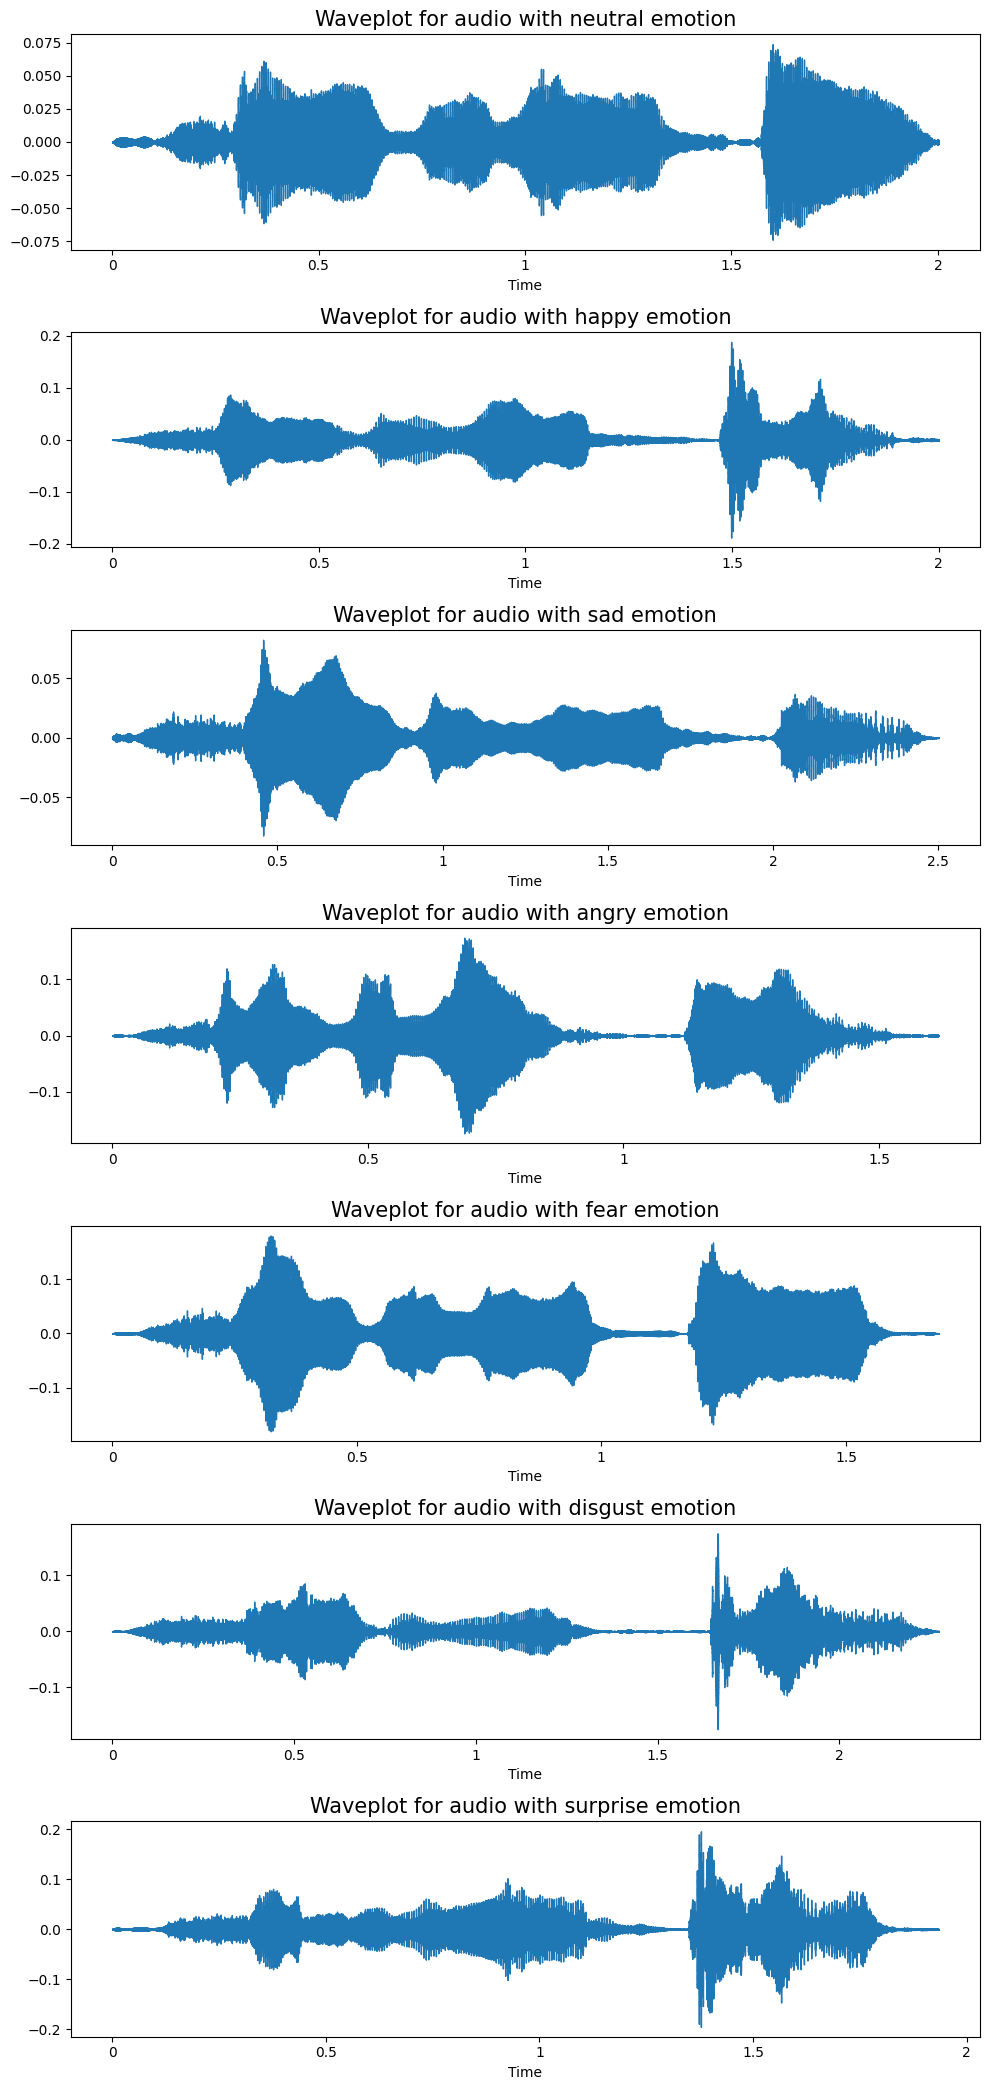

In [ ]:
emotions = ['neutral', 'happy', 'sad', 'angry', 'fear', 'disgust', 'surprise']

def create_waveplot(data, sr, e, ax):
    # Set the title of the plot based on the emotion
    ax.set_title('Waveplot for audio with {} emotion'.format(e), size=15)
    # Display the waveplot using the provided data, sampling rate, and axis
    librosa.display.waveshow(data, sr=sr, ax=ax)

# Create subplots for each emotion
fig, axs = plt.subplots(len(emotions), figsize=(10, 3*len(emotions)))

# Iterate over each emotion
for i, emotion in enumerate(emotions):
    # Get the path of the audio file for the current emotion
    path = np.array(Tess_df.Path[Tess_df.Emotions==emotion])[1]
    # Load the audio data and sampling rate using librosa
    data, sampling_rate = librosa.load(path)
    # Call the create_waveplot function to create the waveplot for the current emotion
    create_waveplot(data, sampling_rate, emotion, axs[i])

# Adjust the layout of the subplots
plt.tight_layout()
# Display the plot
plt.show()

**Data Augmentation by adding only noise to the provided audio data**

Add noise to an audio file and then display a waveplot of the noisy audio.

1. noise(data): This function is defined to add noise to the input audio data. The amplitude of the noise is set to 3.5% of the maximum value in the audio data, multiplied by a random number between 0 and 1. The noise itself is generated as a set of random numbers with a normal distribution (mean 0, standard deviation 1), and the same shape as the input data. The function returns the noisy audio data.

2. x = noise(data): This line calls the noise() function with the audio data as an argument, and stores the noisy audio data in x.

3. plt.figure(figsize=(14,4)) and librosa.display.waveshow(y=x, sr=sample_rate): These lines create a figure and display a waveplot of the noisy audio data.

4. Audio(x, rate=sample_rate): This line creates an audio player widget in a Jupyter notebook that can play the noisy audio data.

5. path = np.array(Tess_df.Path)[1] and data, sample_rate = librosa.load(path): These lines get the path of the second audio file in the Tess_df DataFrame, and load the audio data and its sample rate using the librosa.load() function.

In [ ]:
# Accessing the second element of the 'Path' column in the 'Tess_df' DataFrame
path = np.array(Tess_df.Path)[1]

# Loading the audio data and its sample rate using librosa library
data, sample_rate = librosa.load(path)

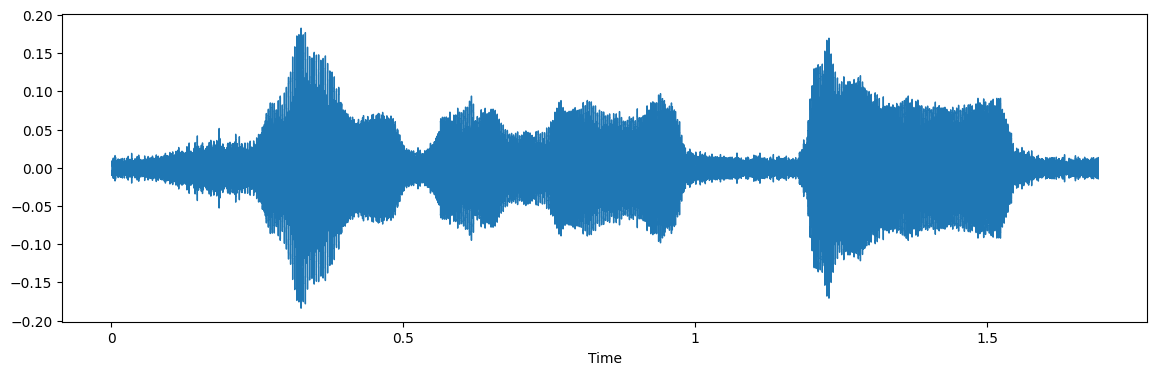

In [ ]:
def noise(data):
    # Calculate the amplitude of the noise based on a random value and the maximum value in the data
    noise_amp = 0.035*np.random.uniform()*np.amax(data)

    # Add noise to the data by multiplying the noise amplitude with a random normal distribution
    data = data + noise_amp*np.random.normal(size=data.shape[0])

    # Return the modified data with added noise
    return data

# Call the noise function and assign the result to variable x
x = noise(data)

# Create a figure with a specific size for plotting
plt.figure(figsize=(14,4))

# Display the waveform of the modified data using librosa library
librosa.display.waveshow(y=x, sr=sample_rate)

# Play the modified audio using the Audio function
Audio(x, rate=sample_rate)

**Feature Extraction**

Defines two functions, extract_features(data) and get_features(path), which are used to extract audio features from an audio file.

1. extract_features(data): This function takes an audio data array as input and extracts several features from it:

  * Zero Crossing Rate (ZCR): The rate at which the signal changes from positive to * negative or back.
  * Chroma Frequencies: Pertains to the 12 different pitch classes.
  *Mel-Frequency Cepstral Coefficients (MFCCs): Represent the short-term power spectrum of a sound.
  * Root Mean Square (RMS) Value: A measure of the power of the audio signal.
  * MelSpectrogram: A representation of the short-term power spectrum of a sound.
Each of these features is calculated using functions from the librosa library, and the mean value of each feature is taken. The features are then stacked horizontally into a single array using np.hstack(), and this array is returned.

2. get_features(path): This function takes a path to an audio file as input. It loads the audio file using librosa.load(), with a duration of 2.5 seconds and an offset of 0.6 seconds to skip any silence at the beginning and end of the file. It then extracts features from the audio data in two ways:

  * Without augmentation: It calls extract_features(data) to extract features from the original audio data.
  * With noise augmentation: It adds noise to the audio data using the noise(data) function (not shown in the provided code), and then calls extract_features(noise_data) to extract features from the noisy audio data.
The feature arrays from the original and noisy audio data are then stacked vertically into a single array using np.vstack(), and this array is returned.

In [ ]:
def extract_features(data):
    # ZCR (Zero Crossing Rate)
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft (Chroma feature from a spectrogram)
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC (Mel-frequency cepstral coefficients)
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally

    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)

    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)

    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically

    return result

**Saving extracted data in feature csv for model creation and testing**



1. Two empty lists, X and Y, are initialized. X will be used to store the features extracted from the audio files, and Y will store the corresponding emotions.

2. The zip() function is used to iterate over two lists (Tess_df.Path and Tess_df.Emotions) simultaneously. For each iteration, path is an element from Tess_df.Path (which is presumably a path to an audio file), and emotion is an element from Tess_df.Emotions (which is presumably the emotion label for the audio file).

3. The get_features(path) function is called with the path variable as an argument. This function is not shown in the provided code, but it presumably extracts features from the audio file at the given path and returns them as a list or similar data structure.

4. The returned features are then iterated over, and each feature is appended to the X list.

5. For each feature appended to X, the corresponding emotion is appended to Y. The comment suggests that each audio file is augmented in one way, and therefore the same emotion is appended once for each audio file.

In [ ]:
X, Y = [], []  # Initialize empty lists X and Y to store features and emotions

# Iterate over the paths and emotions in the zip of Tess_df.Path and Tess_df.Emotions
for path, emotion in zip(Tess_df.Path, Tess_df.Emotions):
    feature = get_features(path)  # Get the features for the current path
    for ele in feature:  # Iterate over each element in the feature list
        X.append(ele)  # Append the element to the X list
        # Append the emotion to the Y list (appending it 1 time for each augmentation technique applied)
        Y.append(emotion)

In [ ]:
len(X),  # Get the length of the X variable
len(Y),  # Get the length of the Y variable
Tess_df.Path.shape  # Get the shape of the Path column in the Tess_df DataFrame

In [ ]:
Features = pd.DataFrame(X)  # Create a DataFrame called "Features" from the data in X
Features['labels'] = Y  # Add a new column called "labels" to the Features DataFrame and assign it the values from Y
Features.to_csv('features.csv', index=False)  # Save the Features DataFrame to a CSV file called "features.csv" without including the index
Features.head()  # Display the first few rows of the Features DataFrame

**Loading Features CSV for evaluation and model creation**

In [ ]:
Features = pd.read_csv("/content/drive/MyDrive/IDL_Project/Dataset/features_tess.csv")

**Data Prepration by Splitting the Features CSV for training and testing**

1. X = Features.iloc[: ,:-1].values and Y = Features['labels'].values: These lines extract the features and labels from a DataFrame named 'Features'. 'X' contains all columns except the last one (which are the features), and 'Y' contains the 'labels' column (which are the targets).

2. encoder = OneHotEncoder(): This line creates an instance of the OneHotEncoder class from the sklearn library. This will be used to one-hot encode the labels, which is necessary for multiclass classification problems.

3. Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray(): This line reshapes 'Y' into a 2D array, applies one-hot encoding to it, and then converts the result back into an array.

4. x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True): This line splits the data into training and testing sets using the train_test_split function from the sklearn library.

5. scaler = StandardScaler(): This line creates an instance of the StandardScaler class from the sklearn library. This will be used to scale the features.

6. x_train = scaler.fit_transform(x_train) and x_test = scaler.transform(x_test): These lines fit the scaler to the training data and transform it, and then transform the test data using the same scaler. This ensures that both the training and test data are scaled in the same way.

7. x_train = np.expand_dims(x_train, axis=2) and x_test = np.expand_dims(x_test, axis=2): These lines add an extra dimension to the training and test data. This is necessary when using certain types of models, such as Convolutional Neural Networks (CNNs) or Recurrent Neural Networks (RNNs), which expect input data to have a certain number of dimensions.

In [ ]:
X = Features.iloc[: ,:-1].values  # Extract all rows and all columns except the last one from the 'Features' DataFrame and assign it to 'X'
Y = Features['labels'].values  # Extract the 'labels' column from the 'Features' DataFrame and assign it to 'Y'

In [ ]:
# As this is a multiclass classification problem, we need to one-hot encode our Y variable.

# Create an instance of the OneHotEncoder class.
encoder = OneHotEncoder()

'''
Reshape the Y variable into a 2D array with a single column using np.array(Y).reshape(-1,1).
Then, apply one-hot encoding to the reshaped Y variable using encoder.fit_transform().
Finally, convert the encoded Y variable to an array using toarray().
'''

Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [ ]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)  # Splitting the data into training and testing sets
x_train.shape, y_train.shape, x_test.shape, y_test.shape  # Printing the shapes of the training and testing sets

((4200, 162), (4200, 7), (1400, 162), (1400, 7))

In [ ]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()  # Create an instance of the StandardScaler class from the sklearn library

x_train = scaler.fit_transform(x_train)  '''Fit the scaler to the training data and transform it
# The fit_transform method calculates the mean and standard deviation of the training data and scales it accordingly'''

x_test = scaler.transform(x_test)  '''Transform the test data using the same scaler
The transform method applies the same scaling transformation to the test data using the mean and standard deviation calculated from the training data'''

x_train.shape, y_train.shape, x_test.shape, y_test.shape  '''Print the shapes of the training and test data arrays
# This line is used to check the shapes of the arrays after scaling to ensure they are consistent'''

((4200, 162), (4200, 7), (1400, 162), (1400, 7))

In [ ]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)  # Expanding the dimensions of x_train by adding an extra axis at axis=2
x_test = np.expand_dims(x_test, axis=2)    # Expanding the dimensions of x_test by adding an extra axis at axis=2
x_train.shape, y_train.shape, x_test.shape, y_test.shape  # Printing the shapes of x_train, y_train, x_test, and y_test

((4200, 162, 1), (4200, 7), (1400, 162, 1), (1400, 7))

## LSTM Model

1. LSTM_model = Sequential(): This line initializes a new Sequential model. Sequential is a linear stack of layers that you can easily create by passing a list of layer instances to the constructor.

2. The next three lines add layers to the model:

3. An LSTM layer with 256 units, input shape of (162, 1), return sequences set to True (which means it returns the full sequence), and L2 regularization.
Another LSTM layer with 128 units and L2 regularization.
A Dense output layer with 7 units (one for each class), a softmax activation function (which is commonly used for multiclass classification), and L2 regularization.
optimizer = Adam(learning_rate=0.0001): This line creates an instance of the Adam optimizer with a learning rate of 0.0001.

4. LSTM_model.compile(...): This line compiles the model with the categorical cross-entropy loss function (which is commonly used for multiclass classification), the Adam optimizer, and accuracy as the evaluation metric.

5. early_stopping_loss = EarlyStopping(monitor='val_loss', patience=3): This line creates an EarlyStopping callback that will stop training when the validation loss ('val_loss') has not improved for 3 epochs.

6. history = LSTM_model.fit(...): This line trains the model for 50 epochs using the training data (x_train, y_train), with the test data (x_test, y_test) as the validation data, and the EarlyStopping callback.

7. val_loss, val_acc = LSTM_model.evaluate(x_test, y_test): This line evaluates the model on the test data and returns the loss and accuracy.

8. The final two lines print the validation loss and accuracy.

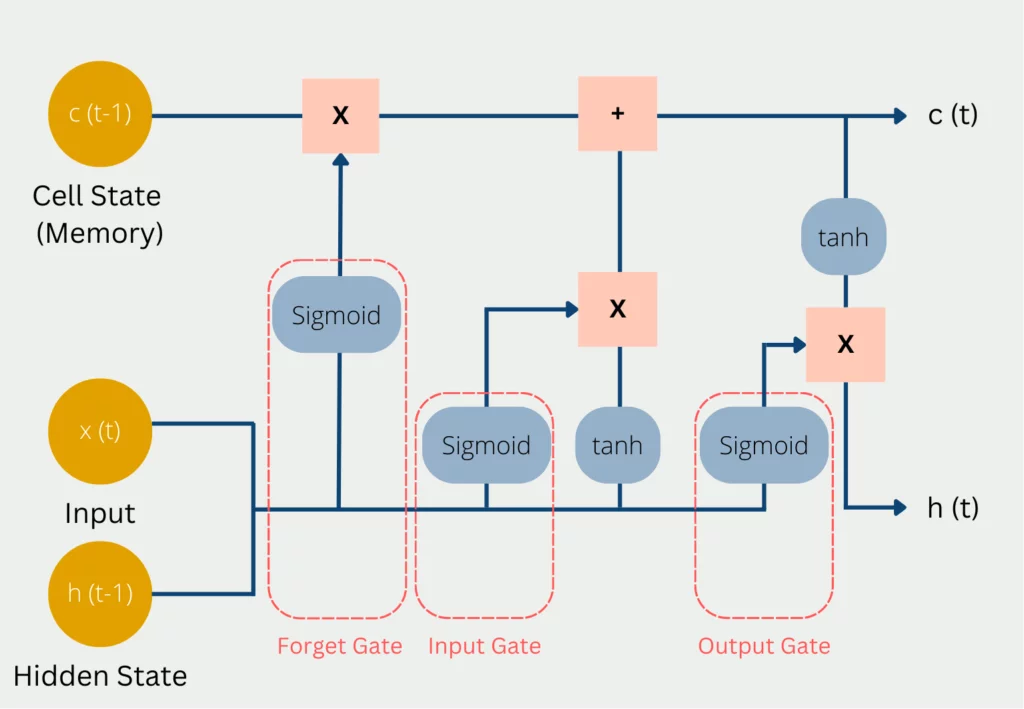

In [ ]:
# Define the model architecture
LSTM_model = Sequential()  # Create a sequential model
LSTM_model.add(LSTM(256, input_shape=(162, 1), return_sequences=True, kernel_regularizer=l2(0.01)))  # Add an LSTM layer with 256 units, input shape of (162, 1), and L2 regularization
LSTM_model.add(LSTM(128, kernel_regularizer=l2(0.01)))  # Add another LSTM layer with 128 units and L2 regularization
LSTM_model.add(Dense(7, activation='softmax', kernel_regularizer=l2(0.01)))  # Add a dense layer with 7 units, softmax activation, and L2 regularization

# Compile the model with a learning rate of 0.0001 and a different optimizer
optimizer = Adam(learning_rate=0.0001)  # Create an Adam optimizer with a learning rate of 0.0001
LSTM_model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])  # Compile the model with categorical cross-entropy loss and the Adam optimizer

# Define early stopping callback
early_stopping_loss = EarlyStopping(monitor='val_loss', patience=3)  # Create an early stopping callback that monitors validation loss and waits for 3 epochs of no improvement

# Train the model
history = LSTM_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, callbacks=[early_stopping_loss])  # Train the model on the training data, validate on the test data, and use the early stopping callback

# Evaluate the model
val_loss, val_acc = LSTM_model.evaluate(x_test, y_test)  # Evaluate the model on the test data

# Print the validation loss and accuracy
print("Validation Loss:", val_loss)  # Print the validation loss
print("Validation Accuracy:", val_acc)  # Print the validation accuracy

Epoch 1/50
132/132 [==============================] - 113s 820ms/step - loss: 4.7698 - accuracy: 0.2076 - val_loss: 4.1224 - val_accuracy: 0.2650
Epoch 2/50
132/132 [==============================] - 116s 881ms/step - loss: 3.7011 - accuracy: 0.2479 - val_loss: 3.2855 - val_accuracy: 0.2971
Epoch 3/50
132/132 [==============================] - 106s 801ms/step - loss: 2.9591 - accuracy: 0.2983 - val_loss: 2.6309 - val_accuracy: 0.3314
Epoch 4/50
132/132 [==============================] - 104s 788ms/step - loss: 2.4648 - accuracy: 0.3505 - val_loss: 2.2579 - val_accuracy: 0.4100
Epoch 5/50
132/132 [==============================] - 107s 811ms/step - loss: 2.1177 - accuracy: 0.4145 - val_loss: 2.0003 - val_accuracy: 0.4243
Epoch 6/50
132/132 [==============================] - 105s 792ms/step - loss: 1.9066 - accuracy: 0.4186 - val_loss: 1.8120 - val_accuracy: 0.4279
Epoch 7/50
132/132 [==============================] - 107s 812ms/step - loss: 1.7646 - accuracy: 0.4538 - val_loss: 1.7712 -

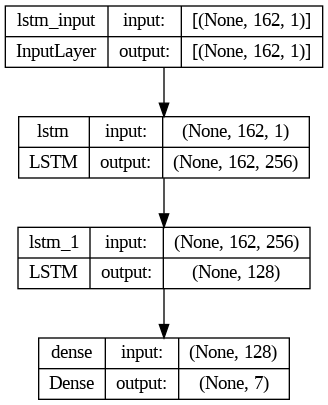

In [ ]:
plot_model(LSTM_model, to_file='model_block.png', show_shapes=True, show_layer_names=True)  # Plot the LSTM_model architecture and save it as 'model_block.png'

**Model Testing and Evaluation**

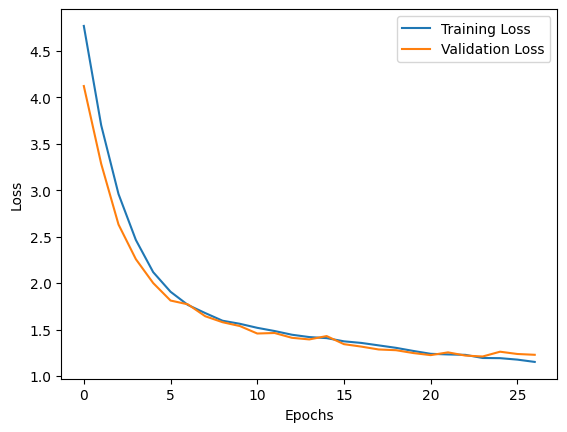

In [ ]:
# Plot Learning Curve
plt.plot(history.history['loss'], label='Training Loss')  # Plot the training loss values
plt.plot(history.history['val_loss'], label='Validation Loss')  # Plot the validation loss values
plt.xlabel('Epochs')  # Set the x-axis label to 'Epochs'
plt.ylabel('Loss')  # Set the y-axis label to 'Loss'
plt.legend()  # Display the legend
plt.show()  # Show the plot

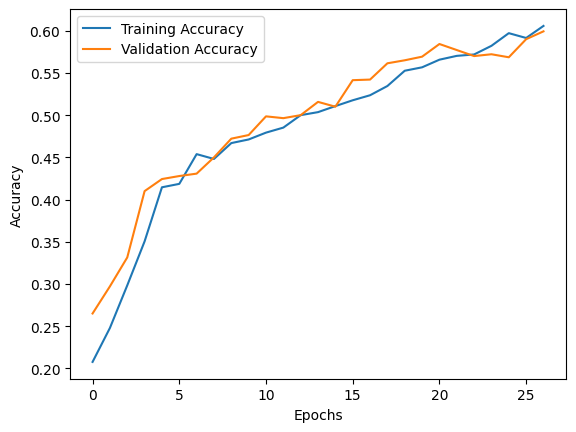

In [ ]:
# Plot training vs validation accuracy graph
plt.plot(history.history['accuracy'], label='Training Accuracy')  # Plot the training accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Plot the validation accuracy
plt.xlabel('Epochs')  # Set the x-axis label to "Epochs"
plt.ylabel('Accuracy')  # Set the y-axis label to "Accuracy"
plt.legend()  # Display the legend
plt.show()  # Show the plot

In [ ]:
# predicting on test data.
pred_test = LSTM_model.predict(x_test)  # Predicting the output using the LSTM model on the test data.

y_pred = encoder.inverse_transform(pred_test)  # Inverse transforming the predicted values to their original form using the encoder.

y_test = encoder.inverse_transform(y_test)  # Inverse transforming the actual test values to their original form using the encoder.

44/44 [==============================] - 11s 227ms/step


In [ ]:
# Create an empty DataFrame with columns 'Predicted Labels' and 'Actual Labels'
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])

# Flatten the 'y_pred' array and assign it to the 'Predicted Labels' column of the DataFrame
df['Predicted Labels'] = y_pred.flatten()

# Flatten the 'y_test' array and assign it to the 'Actual Labels' column of the DataFrame
df['Actual Labels'] = y_test.flatten()

# Display the first 10 rows of the DataFrame
df.head(10)

,Predicted Labels,Actual Labels
0,disgust,surprise
1,happy,angry
2,surprise,fear
3,surprise,fear
4,angry,angry
5,disgust,surprise
6,disgust,disgust
7,sad,sad
8,disgust,neutral
9,surprise,neutral


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Predicted Labels').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Actual Labels').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Predicted Labels')):
  _plot_series(series, series_name, i)
  fig.legend(title='Predicted Labels', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Actual Labels')):
  _plot_series(series, series_name, i)
  fig.legend(title='Actual Labels', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Actual Labels'].value_counts()
    for x_label, grp in _df_6.groupby('Predicted Labels')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Predicted Labels')
_ = plt.ylabel('Actual Labels')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_7['Predicted Labels'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_7, x='index', y='Predicted Labels', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_8['Actual Labels'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_8, x='index', y='Actual Labels', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

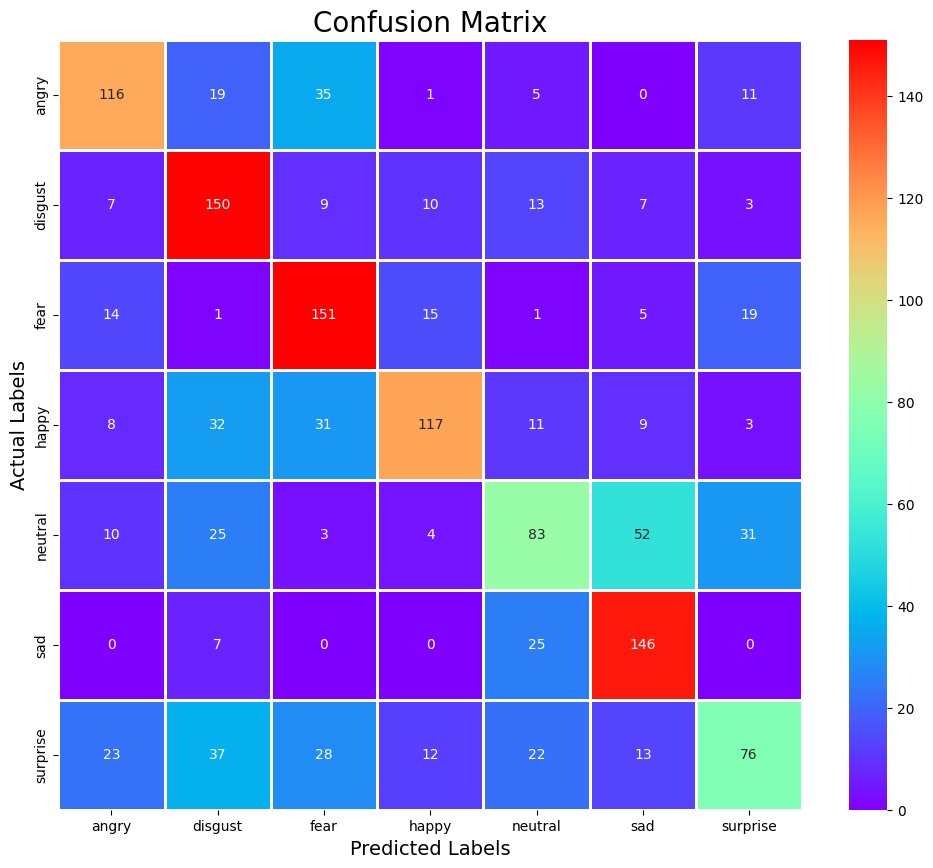

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a figure with a specific size
plt.figure(figsize=(12, 10))

# Convert the confusion matrix into a DataFrame for better visualization
cm = pd.DataFrame(cm, index=[i for i in encoder.categories_], columns=[i for i in encoder.categories_])

# Create a heatmap using the seaborn library to visualize the confusion matrix
sns.heatmap(cm, linecolor='white', cmap='rainbow', linewidth=1, annot=True, fmt='')

# Set the title and labels for the plot
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)

# Display the plot
plt.show()

In [ ]:
# Print classification report for LSTM model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.65      0.62      0.64       187
     disgust       0.55      0.75      0.64       199
        fear       0.59      0.73      0.65       206
       happy       0.74      0.55      0.63       211
     neutral       0.52      0.40      0.45       208
         sad       0.63      0.82      0.71       178
    surprise       0.53      0.36      0.43       211

    accuracy                           0.60      1400
   macro avg       0.60      0.61      0.59      1400
weighted avg       0.60      0.60      0.59      1400



We recieved an overall accuracy of 60% from Simple LSTM model

## Simple RNN model

1. rnn_model = Sequential(): This line initializes a new Sequential model. Sequential is a linear stack of layers that you can easily create by passing a list of layer instances to the constructor.

2. The next five lines add layers to the model:

  * A SimpleRNN layer with 256 units and input shape of (162, 1).
  * Three Dense layers with 128, 64, and 32 units respectively, and a ReLU activation function.
  * A Dense output layer with 7 units (one for each class), and a softmax activation function (which is commonly used for multiclass classification).
3. optimizer = Adam(learning_rate=0.0001): This line creates an instance of the Adam optimizer with a learning rate of 0.0001.

4. rnn_model.compile(...): This line compiles the model with the categorical cross-entropy loss function (which is commonly used for multiclass classification), the Adam optimizer, and accuracy as the evaluation metric.

5. early_stopping_loss = EarlyStopping(monitor='val_loss', patience=3): This line creates an EarlyStopping callback that will stop training when the validation loss ('val_loss') has not improved for 3 epochs.

6. history = rnn_model.fit(...): This line trains the model for 50 epochs using the training data (x_train, y_train), with the test data (x_test, y_test) as the validation data, and the EarlyStopping callback.

7. val_loss, val_acc = rnn_model.evaluate(x_test, y_test): This line evaluates the model on the test data and returns the loss and accuracy.

8. The final two lines print the validation loss and accuracy.

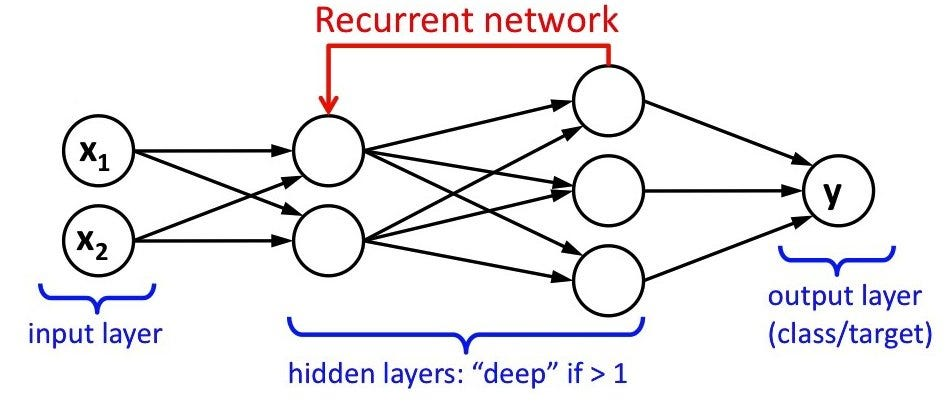

In [ ]:
# Define the model
rnn_model = Sequential()  # Create a sequential model
rnn_model.add(SimpleRNN(units=256, input_shape=(162, 1)))  # Add a SimpleRNN layer with 256 units
rnn_model.add(Dense(units=128, activation='relu'))  # Add a dense layer with 128 units and ReLU activation
rnn_model.add(Dense(units=64, activation='relu'))  # Add a dense layer with 64 units and ReLU activation
rnn_model.add(Dense(units=32, activation='relu'))  # Add a dense layer with 32 units and ReLU activation
rnn_model.add(Dense(units=7, activation='softmax'))  # Add a dense layer with 7 units and softmax activation

# Compile the model with a learning rate of 0.0001 and a different optimizer
optimizer = Adam(learning_rate=0.0001)  # Create an Adam optimizer with learning rate 0.0001
rnn_model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])  # Compile the model with categorical crossentropy loss and the Adam optimizer

# Define early stopping callback
early_stopping_loss = EarlyStopping(monitor='val_loss', patience=3)  # Create an early stopping callback that monitors validation loss and waits for 3 epochs without improvement

# Train the model
history = rnn_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, callbacks=[early_stopping_loss])  # Train the model on the training data for 50 epochs, using the early stopping callback

# Evaluate the model
val_loss, val_acc = rnn_model.evaluate(x_test, y_test)  # Evaluate the model on the test data and get the validation loss and accuracy

# Print the validation loss and accuracy
print("Validation Loss:", val_loss)  # Print the validation loss
print("Validation Accuracy:", val_acc)  # Print the validation accuracy


Epoch 1/50
132/132 [==============================] - 40s 260ms/step - loss: 1.6712 - accuracy: 0.4760 - val_loss: 1.3804 - val_accuracy: 0.6286
Epoch 2/50
132/132 [==============================] - 21s 158ms/step - loss: 1.0075 - accuracy: 0.7336 - val_loss: 0.7606 - val_accuracy: 0.7993
Epoch 3/50
132/132 [==============================] - 22s 165ms/step - loss: 0.6083 - accuracy: 0.8243 - val_loss: 0.4877 - val_accuracy: 0.8543
Epoch 4/50
132/132 [==============================] - 24s 180ms/step - loss: 0.4526 - accuracy: 0.8598 - val_loss: 0.4392 - val_accuracy: 0.8521
Epoch 5/50
132/132 [==============================] - 21s 157ms/step - loss: 0.3628 - accuracy: 0.8838 - val_loss: 0.3518 - val_accuracy: 0.8850
Epoch 6/50
132/132 [==============================] - 28s 210ms/step - loss: 0.3300 - accuracy: 0.8907 - val_loss: 0.3889 - val_accuracy: 0.8750
Epoch 7/50
132/132 [==============================] - 21s 156ms/step - loss: 0.2895 - accuracy: 0.9031 - val_loss: 0.2538 - val_ac

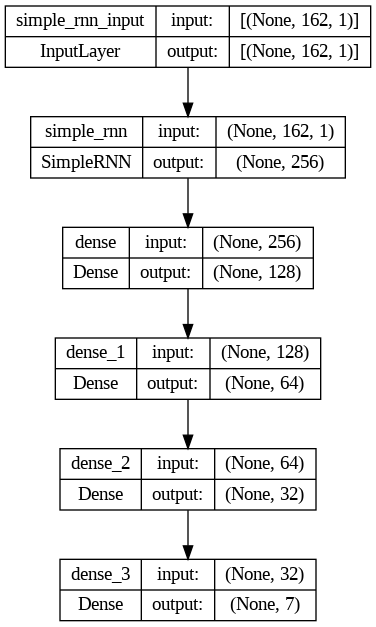

In [ ]:
plot_model(rnn_model, to_file='model_circular.png', show_shapes=True, show_layer_names=True)  # Plot the model architecture and save it as an image file

**Model Testing and Evaluation**

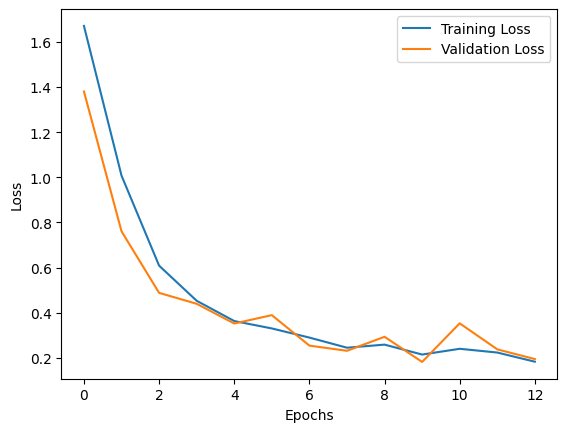

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')  # Plot the training loss values
plt.plot(history.history['val_loss'], label='Validation Loss')  # Plot the validation loss values
plt.xlabel('Epochs')  # Set the x-axis label to 'Epochs'
plt.ylabel('Loss')  # Set the y-axis label to 'Loss'
plt.legend()  # Display the legend
plt.show()  # Show the plot

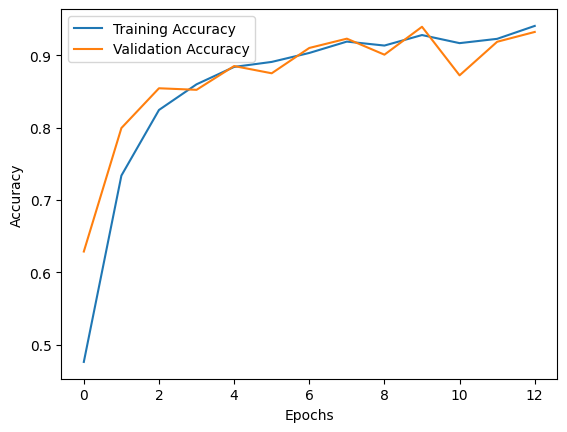

In [ ]:
# Plot learning curve
plt.plot(history.history['accuracy'], label='Training Accuracy')  # Plot the training accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Plot the validation accuracy
plt.xlabel('Epochs')  # Set the x-axis label to 'Epochs'
plt.ylabel('Accuracy')  # Set the y-axis label to 'Accuracy'
plt.legend()  # Display the legend
plt.show()  # Show the plot

In [ ]:
# predicting on test data.
pred_test = rnn_model.predict(x_test)  # Predicting the output using the rnn_model on the test data.

y_pred = encoder.inverse_transform(pred_test)  # Inverse transforming the predicted values using the encoder.

y_test = encoder.inverse_transform(y_test)  # Inverse transforming the actual values using the encoder.

44/44 [==============================] - 2s 46ms/step


In [ ]:
# Create an empty DataFrame with columns 'Predicted Labels' and 'Actual Labels'
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])

# Flatten the 'y_pred' array and assign it to the 'Predicted Labels' column of the DataFrame
df['Predicted Labels'] = y_pred.flatten()

# Flatten the 'y_test' array and assign it to the 'Actual Labels' column of the DataFrame
df['Actual Labels'] = y_test.flatten()

# Display the first 10 rows of the DataFrame
df.head(10)

,Predicted Labels,Actual Labels
0,surprise,surprise
1,angry,angry
2,fear,fear
3,fear,fear
4,angry,angry
5,disgust,surprise
6,disgust,disgust
7,sad,sad
8,neutral,neutral
9,neutral,neutral


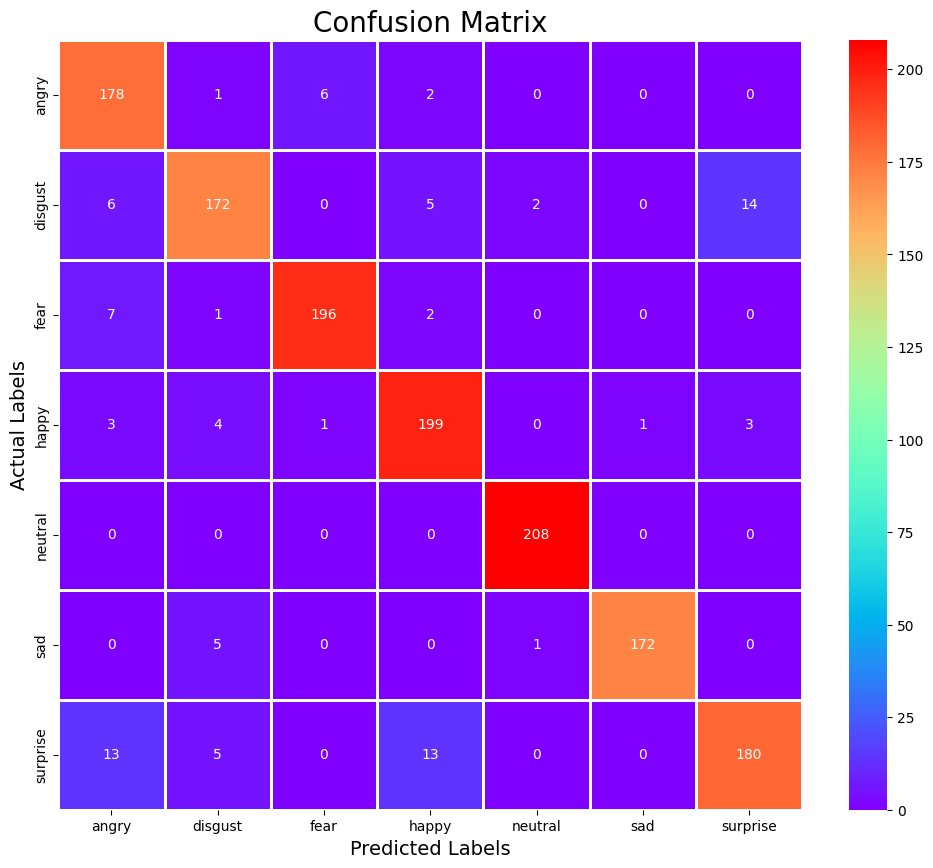

In [ ]:
# Calculate the confusion matrix using y_test and y_pred
cm = confusion_matrix(y_test, y_pred)

# Create a figure with a size of 12x10 inches
plt.figure(figsize=(12, 10))

# Create a DataFrame from the confusion matrix, with row and column labels
cm = pd.DataFrame(cm, index=[i for i in encoder.categories_], columns=[i for i in encoder.categories_])

# Create a heatmap using the DataFrame, with white lines separating cells, rainbow color map, and no cell values displayed
sns.heatmap(cm, linecolor='white', cmap='rainbow', linewidth=1, annot=True, fmt='')

# Set the title of the plot to 'Confusion Matrix' with font size 20
plt.title('Confusion Matrix', size=20)

# Set the x-axis label to 'Predicted Labels' with font size 14
plt.xlabel('Predicted Labels', size=14)

# Set the y-axis label to 'Actual Labels' with font size 14
plt.ylabel('Actual Labels', size=14)

# Display the plot
plt.show()

In [ ]:
#Print classification report for Simple RNN model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.86      0.95      0.90       187
     disgust       0.91      0.86      0.89       199
        fear       0.97      0.95      0.96       206
       happy       0.90      0.94      0.92       211
     neutral       0.99      1.00      0.99       208
         sad       0.99      0.97      0.98       178
    surprise       0.91      0.85      0.88       211

    accuracy                           0.93      1400
   macro avg       0.93      0.93      0.93      1400
weighted avg       0.93      0.93      0.93      1400



We obtained a notable good accuracy of 93% from Simple RNN model.
We observed a significant increase in model accuracy (33% accuracy rise) from Simple LSTM model to Simple RNN model.